# **Understanding and Visualizing Data**

In [ ]:
#load libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Employee Attriation Prediction/WA_Fn-UseC_-HR-Employee-Attrition.csv')
#copy the data to another df
empdf = data.copy()

In [ ]:
empdf.shape

(1470, 35)

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 30


In [ ]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
empdf.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [ ]:
empdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# pie chart for attrition
fig = go.Figure()
fig.add_trace(go.Pie(labels=empdf['Attrition'], values=empdf['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [ ]:
empdf.isnull().sum().sum()

0

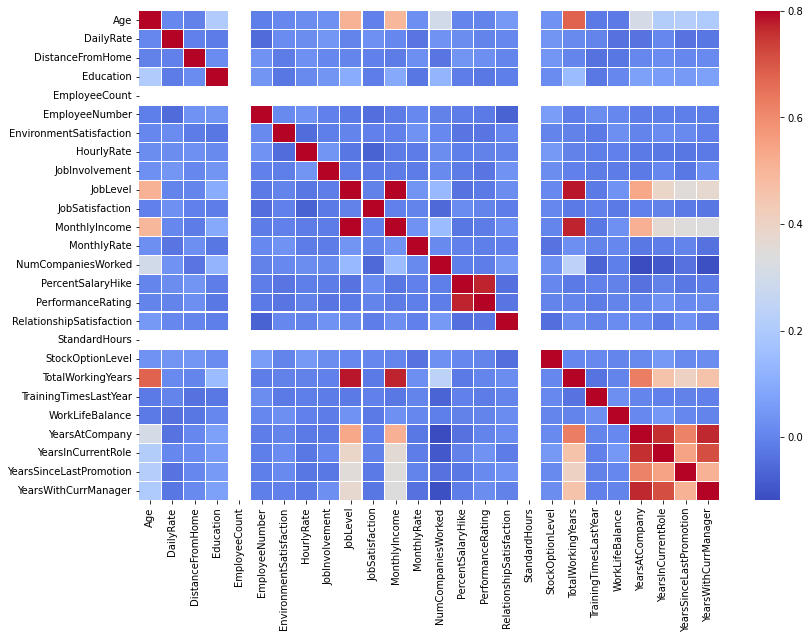

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [ ]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [ ]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
empdf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

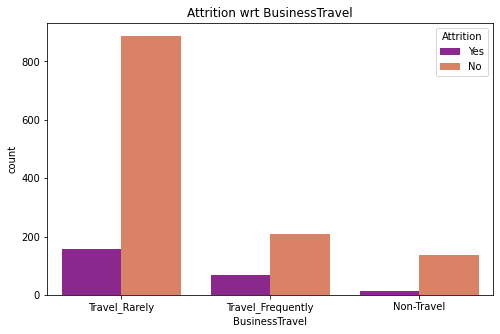

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [ ]:
#Department
empdf['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

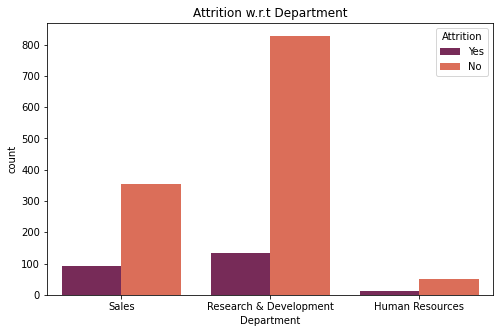

In [ ]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=empdf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [ ]:
#EducationField
empdf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

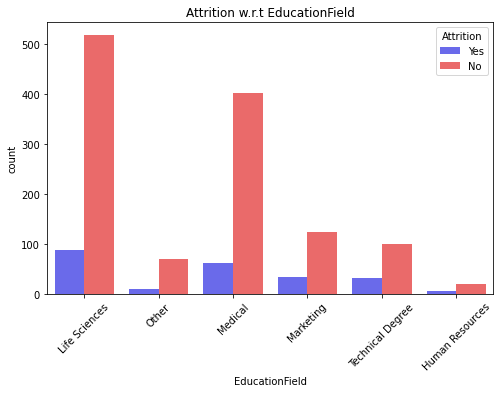

In [ ]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=empdf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Gender
empdf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

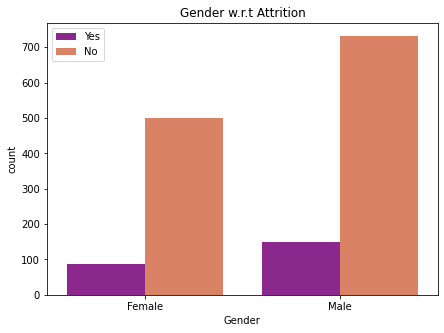

In [ ]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=empdf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [ ]:
# let's also see, how any male and female are Married
pd.crosstab(empdf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


In [ ]:
#JobRole
empdf['JobRole'].nunique()

9

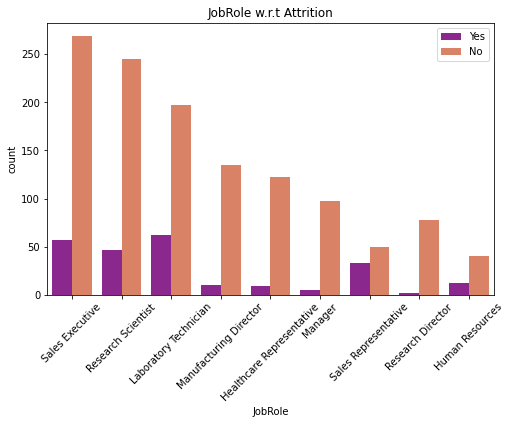

In [ ]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=empdf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#OverTime
empdf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

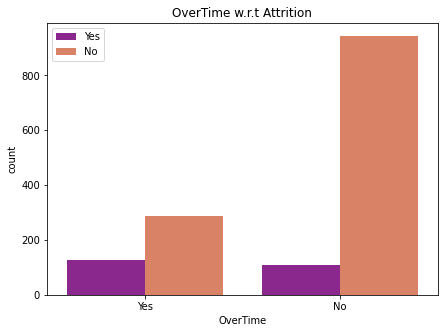

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=empdf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [ ]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


In [ ]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [ ]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


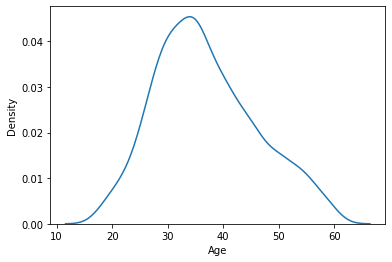

In [ ]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

In [ ]:
empdf['Age'].nunique()

43

In [ ]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
empdf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [ ]:
# Education
empdf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

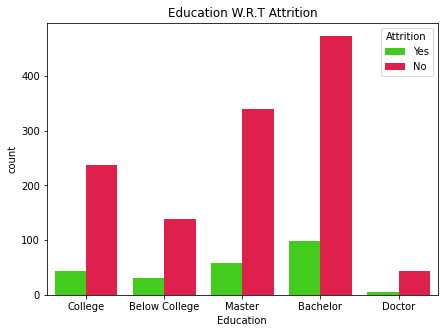

In [ ]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=empdf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [ ]:
#EnvironmentSatisfaction
empdf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
#JobInvolvement
empdf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [ ]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [ ]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


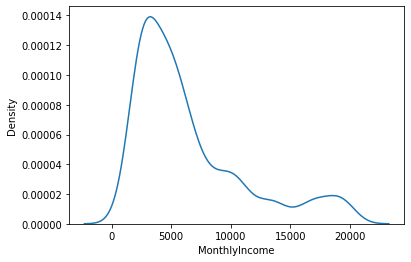

In [ ]:
#MonthlyIncome
sns.distplot(empdf['MonthlyIncome'],hist=False)
plt.show()

In [ ]:
# MonthlyIncome with respect to Age of Employee

#sns.lineplot(x='Age',y='MonthlyIncome', data=empdf)
trace = go.Scatter(x=empdf['Age'],y=empdf['MonthlyIncome'], mode="markers+lines",
                   marker=dict(size=12), line=dict(shape='spline'))
data=[trace]

layout = {"title":"Monthly Income Variation wrt Age",
           "xaxis":{"title":"Age"},
           "yaxis":{"title":"MonthlyIncome"}
         }

iplot({"data":data, "layout":layout})

In [ ]:
# employee count in age group and whicg age employees are more
empdf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
35    78
34    77
36    69
31    69
29    68
Name: EmployeeCount, dtype: int64

In [ ]:
#JobLevel
empdf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

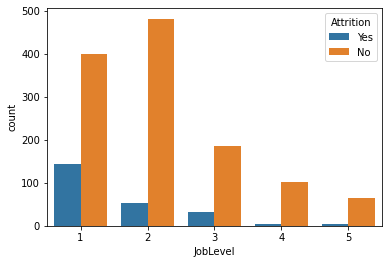

In [ ]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

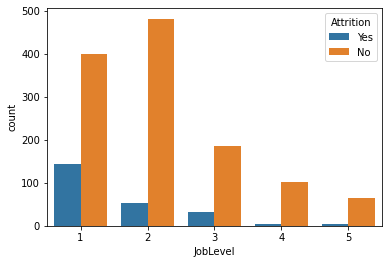

In [ ]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

In [ ]:
empdf['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

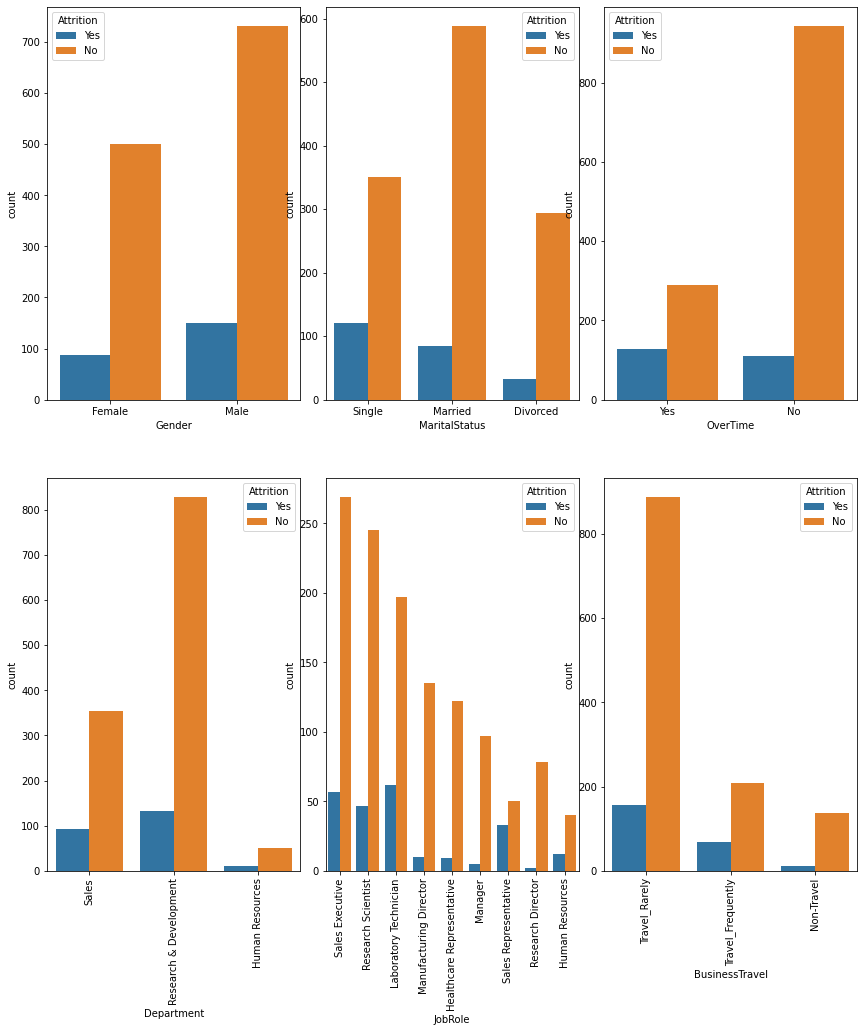

In [ ]:
total_records = len(empdf)
columns = ['Gender','MaritalStatus','OverTime','Department','JobRole','BusinessTravel']

j=0
for i in columns:
  j=j+1
  plt.subplot(2,3,j)
  axl = sns.countplot(data=empdf,x=i,hue="Attrition")
  if(j==4 or j==5 or j==6):
    plt.xticks(rotation=90)

plt.subplots_adjust(bottom=1,top=4,right=2.0,wspace=0.1)

# **Data Pre-Processing**

In [ ]:
empdf.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [ ]:
#drop the columns which have save val in whole dataset or which are unrelevant for Attrition prediction. 
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

# **Categorical Encoding**

In [ ]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# Target Variable(Attrition)
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [ ]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [ ]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    print(map_dict)
    empdf[col] = empdf[col].map(map_dict)
    

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
{'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other': 4, 'Human Resources': 5}
{'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
{'Married': 0, 'Single': 1, 'Divorced': 2}


In [ ]:
empdf[categorical_features].head()


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,0,1,0,1,0,1,Y,1
1,0,1,0,0,0,1,0,Y,0
2,1,0,0,4,0,2,1,Y,1
3,0,1,0,0,1,1,0,Y,1
4,0,0,0,1,0,2,0,Y,0


In [ ]:
# drop the Over18 column
empdf.drop('Over18',axis=1,inplace=True)

In [ ]:
x = empdf.drop('Attrition',axis=1)
y = empdf['Attrition']

In [ ]:
# empdf.head().T

In [ ]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

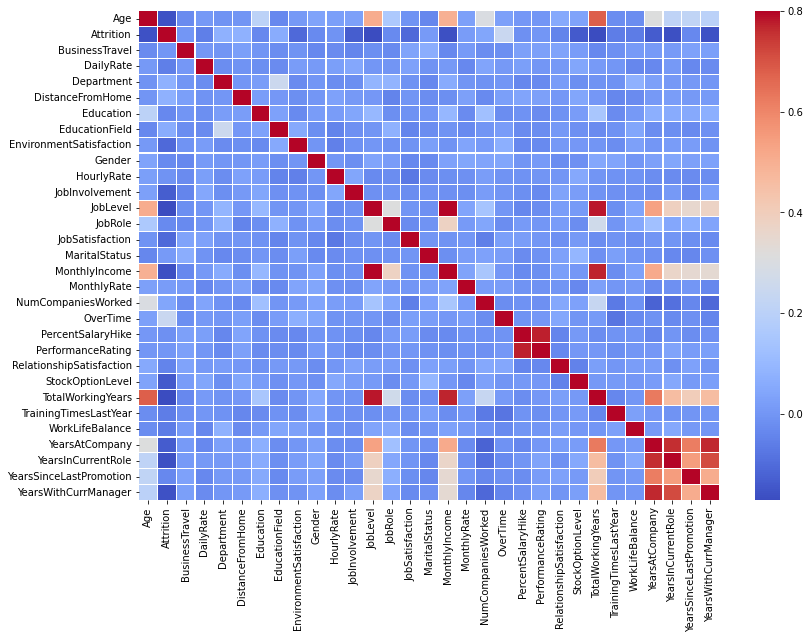

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [ ]:
empdf.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,0.389116,9.192517,2.912925,1.116327,2.721769,0.400000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.568893,8.106864,1.024165,1.289616,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,802.000000,0.000000,7.000000,3.000000,1.000000,3.000000,0.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Scaling & Feature Selection**

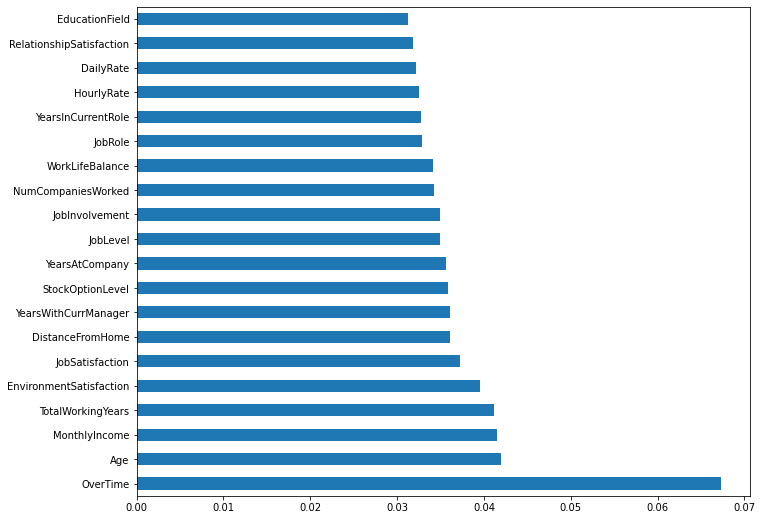

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)
feat_importance = extra_tree.feature_importances_

#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
#Feature Selection chi2
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best feature



                       Specs          Score
15             MonthlyIncome  127922.293694
16               MonthlyRate    1196.633553
2                  DailyRate     956.580494
23         TotalWorkingYears     230.721618
26            YearsAtCompany     142.100054
27        YearsInCurrentRole     117.522596
29      YearsWithCurrManager     110.671534
0                        Age      84.155277
18                  OverTime      63.845067
4           DistanceFromHome      63.772142
22          StockOptionLevel      25.268826
11                  JobLevel      24.939242
6             EducationField       8.499758
28   YearsSinceLastPromotion       7.601723
3                 Department       7.310314
13           JobSatisfaction       7.011947
7    EnvironmentSatisfaction       6.890594
17        NumCompaniesWorked       6.438654
10            JobInvolvement       4.605616
24     TrainingTimesLastYear       3.085796
12                   JobRole       2.424112
21  RelationshipSatisfaction    

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [ ]:
#Data Standarization
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.041498
BusinessTravel              0.022896
DailyRate                   0.033077
Department                  0.021788
DistanceFromHome            0.035386
Education                   0.027420
EducationField              0.030256
EnvironmentSatisfaction     0.039478
Gender                      0.021086
HourlyRate                  0.032462
JobInvolvement              0.034171
JobLevel                    0.033785
JobRole                     0.031457
JobSatisfaction             0.035671
MaritalStatus               0.028952
MonthlyIncome               0.040864
MonthlyRate                 0.032179
NumCompaniesWorked          0.033957
OverTime                    0.069351
PercentSalaryHike           0.030393
PerformanceRating           0.014261
RelationshipSatisfaction    0.033372
StockOptionLevel            0.034600
TotalWorkingYears           0.039343
TrainingTimesLastYear       0.031406
WorkLifeBalance             0.035547
YearsAtCompany              0.037929
Y

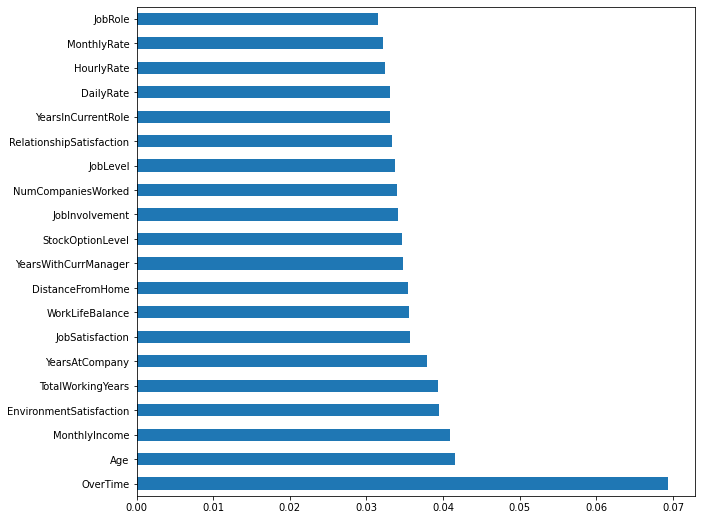

In [ ]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

# **Model Building** 

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc

In [ ]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


#**Logistic Regression**

In [ ]:
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf_model = LogisticRegression()

log_clf_model.fit(x_train,y_train)

y_pred = log_clf_model.predict(x_test)

print(accuracy_score(y_test,y_pred))


0.8722826086956522


In [ ]:
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()  

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[320   0]
 [ 47   1]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       1.00      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.94      0.51      0.49       368
weighted avg       0.89      0.87      0.82       368



In [ ]:
#roc_auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
roc_auc_score = auc(false_positive_rate,true_positive_rate)
                    
print(roc_auc_score)

0.5104166666666666


In [ ]:
#plt.plot(false_positive_rate,true_positive_rate)

# **SVM**

In [ ]:
from sklearn.svm import SVC

svc_clf_model = SVC()

svc_clf_model.fit(x_train,y_train)

y_pred = svc_clf_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8695652173913043


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[320   0]
 [ 48   0]]


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_model = KNeighborsClassifier()

knn_clf_model.fit(x_train,y_train)

y_pred = knn_clf_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8396739130434783


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       320
           1       0.24      0.10      0.14        48

    accuracy                           0.84       368
   macro avg       0.56      0.53      0.53       368
weighted avg       0.79      0.84      0.81       368



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[304  16]
 [ 43   5]]


#**Decision Tree** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_model = DecisionTreeClassifier()

dt_clf_model.fit(x_train,y_train)

y_pred = dt_clf_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.7989130434782609


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       320
           1       0.28      0.33      0.30        48

    accuracy                           0.80       368
   macro avg       0.59      0.60      0.59       368
weighted avg       0.82      0.80      0.81       368



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[278  42]
 [ 32  16]]


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_model = RandomForestClassifier()

rf_clf_model.fit(x_train,y_train)

y_pred = rf_clf_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.875


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.62      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.85      0.88      0.83       368



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[317   3]
 [ 43   5]]


# **Voting Classifier**

In [ ]:
# let's try out VotingClassifier
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf_model),('svc',svc_clf_model),('knn',knn_clf_model),('dt',dt_clf_model),('rf',rf_clf_model)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8722826086956522


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.67      0.04      0.08        48

    accuracy                           0.87       368
   macro avg       0.77      0.52      0.50       368
weighted avg       0.85      0.87      0.82       368



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[319   1]
 [ 46   2]]


# **Feature Scaling**

In [ ]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [ ]:
# # Now check the accuracy score on scalled features
# log_clf = LogisticRegression()
# svc_clf = SVC()
# knn_clf = KNeighborsClassifier()
# dt_clf = DecisionTreeClassifier()
# rf_clf = RandomForestClassifier()

# for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
#     clf.fit(x_train_scaled, y_train_scaled)
    
#     pred = clf.predict(x_test_scaled)
    
#     print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf_model = LogisticRegression()

log_clf_model.fit(x_train_scaled,y_train_scaled)

y_pred = log_clf_model.predict(x_test_scaled)


print(accuracy_score(y_test_scaled,y_pred))

print(classification_report(y_test_scaled, y_pred))
cm = confusion_matrix(y_test_scaled,y_pred)
print(cm)

0.904891304347826
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       320
           1       0.93      0.29      0.44        48

    accuracy                           0.90       368
   macro avg       0.92      0.64      0.70       368
weighted avg       0.91      0.90      0.88       368

[[319   1]
 [ 34  14]]


In [ ]:


svc_clf_model = SVC()

svc_clf_model.fit(x_train_scaled,y_train_scaled)

y_pred = svc_clf_model.predict(x_test_scaled)


print(accuracy_score(y_test_scaled,y_pred))

print(classification_report(y_test_scaled, y_pred))

cm = confusion_matrix(y_test_scaled,y_pred)
print(cm)

0.8831521739130435
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       320
           1       0.86      0.12      0.22        48

    accuracy                           0.88       368
   macro avg       0.87      0.56      0.58       368
weighted avg       0.88      0.88      0.84       368

[[319   1]
 [ 42   6]]


In [ ]:
#KNN
knn_clf_model = KNeighborsClassifier()

knn_clf_model.fit(x_train_scaled,y_train_scaled)

y_pred = knn_clf_model.predict(x_test_scaled)

print(accuracy_score(y_test_scaled,y_pred))


print(classification_report(y_test_scaled, y_pred))

cm = confusion_matrix(y_test_scaled,y_pred)
print(cm)

0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.58      0.15      0.23        48

    accuracy                           0.88       368
   macro avg       0.73      0.57      0.58       368
weighted avg       0.85      0.88      0.84       368

[[315   5]
 [ 41   7]]


In [ ]:

dt_clf_model = DecisionTreeClassifier()

dt_clf_model.fit(x_train_scaled,y_train_scaled)

y_pred = dt_clf_model.predict(x_test_scaled)

print(accuracy_score(y_test_scaled,y_pred))

print(classification_report(y_test_scaled, y_pred))

cm = confusion_matrix(y_test_scaled,y_pred)
print(cm)


0.8097826086956522
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       320
           1       0.30      0.33      0.31        48

    accuracy                           0.81       368
   macro avg       0.60      0.61      0.60       368
weighted avg       0.82      0.81      0.81       368

[[282  38]
 [ 32  16]]


In [ ]:
#Random forest

rf_clf_model = RandomForestClassifier()

rf_clf_model.fit(x_train_scaled,y_train_scaled)

y_pred = rf_clf_model.predict(x_test_scaled)

print(accuracy_score(y_test_scaled,y_pred))

print(classification_report(y_test_scaled, y_pred))

cm = confusion_matrix(y_test_scaled,y_pred)
print(cm)

0.8668478260869565
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.44      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.66      0.53      0.53       368
weighted avg       0.82      0.87      0.83       368

[[315   5]
 [ 44   4]]


In [ ]:
# try votingClf with scaled data

log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8940217391304348


# **Ada Boost** 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
#Adaptive Boosting
#n_estimators -- No of weak learners to train iteratively
#learning rate -- default weight given to each model
# we have 500 models here
#Uses Decision Tree as its Default Model 
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

y_predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,y_predictions))

accuracy: 0.8722826086956522


In [ ]:
#training accuracy
print("training accuracy:",boost.score(x_train_scaled,y_train_scaled))
print("testing accuracy:",boost.score(x_test_scaled,y_test_scaled))

training accuracy: 0.837568058076225
testing accuracy: 0.8722826086956522


In [ ]:
print(classification_report(y_test_scaled, y_predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       1.00      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.94      0.51      0.49       368
weighted avg       0.89      0.87      0.82       368



In [ ]:
cm = confusion_matrix(y_test,y_predictions)
print(cm)

[[320   0]
 [ 47   1]]


# **XGB Boost**

In [ ]:
# XGBOOST - eXtreme Gradient Boosting 
#Speed & Performance 
#Built on Gradient Boost
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8804347826086957


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# **Random Forest**

In [ ]:
#number of trees in forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
#max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]
#quality of split
criterion = ['gini','entropy']
#min no. of samples to consider for splitting a internal node
min_samples_split = [2,5,7,10]
#min number of node can be as leaf node
min_samples_leaf = [2,5,8]
# The number of features to consider when looking for the best split:
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [ ]:
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1,verbose=1,)

rf_random.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [ ]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.8547963800904977
{'n_estimators': 1100, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
# hyperparameter tuning for XgBoost

n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
min_child_weight = list(range(1,10))

xg_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)
print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [6, 12, 18, 24, 30], 'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [ ]:
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_distributions=xg_grid, cv=5, random_state=42,
                               n_iter=10,scoring="accuracy",n_jobs=-1,verbose=1)

xgb_random.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.003,
                                                          0.004, 0.005, 0.006,
                                                          0.007, 0.008, 0.009,
                                                          0.01],
                                        'max_depth': [6, 12, 18, 24, 30],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8629452900041136
best_params: 
 {'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 24, 'learning_rate': 0.004}


# **Generating Pickle File**

In [ ]:
final = LogisticRegression()


In [ ]:

final.fit(x,y)

LogisticRegression()

In [ ]:
import joblib
joblib.dump(final,'mts.pkl')

['mts.pkl']

In [ ]:
x.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
joblib.dump(list(x.columns),'column_names_mts.pkl')

['column_names_mts.pkl']

In [ ]:
col_names_mts = joblib.load('column_names_mts.pkl')

In [ ]:
col_names_mts


['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
loaded_model_mts= joblib.load('mts.pkl')

In [ ]:
#loaded_model_mts.predict(x_test_scaled)
